Homework 9 - NUCE 2100

**Dane Sabo**

*November 19th, 2024*

In [1]:
import numpy as np
import sympy as sm

def answer_print(question,string):
    print('\n=========FINAL ANSWER=========')
    print(question+':')
    print(string)
    print('=========FINAL ANSWER=========\n')

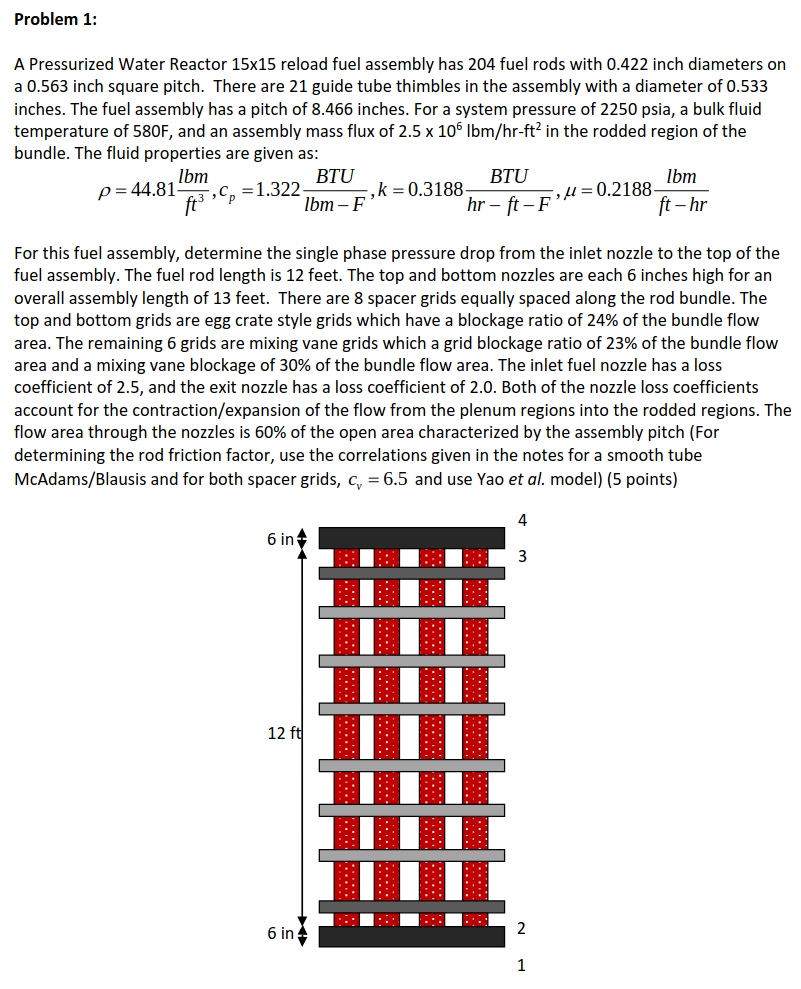


In [2]:
N_rods = 204
N_thimbles = 21

rho_value = 44.81 #lbm/ft^3
C_p = 1.322 #BTU/lbm/F
k = 0.3188 #BTU/hr/ft/F
mu = 0.2188 #lbm/ft/hr
mu = mu/60/60 #lbm/ft/s

d_fuel = 0.422 #in
pitch_rod = 0.563 #in
d_guide = 0.533 #in
pitch_assy = 8.446 #in

P_i = 2250 #psia
T_bulk = 580 #F
G = 2.5e6 #lbm/hr/ft^2 rodded region
G = G/60/60 #lbm/s/ft^2

l_rod = 12 #ft
l_nozzle = 6 #in
epsilon_egg = 0.24
epsilon_mix_grid = 0.23
epsilon_mix_vane = 0.3

k_inlet = 2.5
k_exit = 2.0
epsilon_nozzle = 0.6
#smooth tube
c_v = 6.5
#Yao et al model

g_c_value = 32.174 #lbm-ft/(lbf-s^2)
g_value = 32.174 #ft/s^2

The general form of the pressure drop equation for incompressible flow with no shaft work is:

$$ \frac{V_f^2 - V_i^2}{2 g_c} + \frac{g}{g_c}(z_f - z_i) + \frac{P_f - P_i}{\rho} + w_\text{loss} = 0 $$

We can find the pressure drop for the whole system by breaking it up into chunks. The first chunk is the inlet nozzle:

In [3]:
V_1, V_2, g_c, g, z_1, z_2, P_2, P_1, rho, w_loss = sm.symbols('V_1, V_2, g_c, g, z_1, z_2, P_2, P_1, rho, w_loss')

In [4]:
P12 = sm.Eq(0, (V_2**2 - V_1**2)/2/g_c + g/g_c*(z_2 - z_1) + (P_2 - P_1)/rho + w_loss)
P12

Eq(0, g*(-z_1 + z_2)/g_c + w_loss + (-P_1 + P_2)/rho + (-V_1**2/2 + V_2**2/2)/g_c)

But what are the losses in the nozzle?
- We're given k
- Need to find friction factor

We need to know the velocity of the fluid at the inlet. We know the velocity in the rodded section, and thus can go backwards with the mass flux to find the velocity at the inlet.

In [5]:
D_rodded = 4*((pitch_assy*2)**2 - N_rods*np.pi*d_fuel**2/4 - N_thimbles*np.pi*d_guide**2/4)/(N_rods*np.pi*d_fuel + N_thimbles*np.pi*d_guide)/12 #ft
print(f'Rodded Hydraulic Diameter: {D_rodded:.3e} ft')
D_nozzle = epsilon_nozzle*4*pitch_assy**2/2/pitch_assy
print(f'Nozzle Hydraulic Diameter: {D_nozzle:.3e} ft')
G_nozzle = G*(np.pi*D_rodded**2/4)/(np.pi*D_nozzle**2/4)
print(f'Nozzle Mass Flux: {G_nozzle:.3e} lbm/(s-ft^2)')

Rodded Hydraulic Diameter: 2.750e-01 ft
Nozzle Hydraulic Diameter: 1.014e+01 ft
Nozzle Mass Flux: 5.112e-01 lbm/(s-ft^2)


In [6]:
Re_nozzle = G_nozzle*D_nozzle/mu
print(f'Reynolds Number in Nozzle: {Re_nozzle:.3e}')

Reynolds Number in Nozzle: 8.525e+04


Now we can apply Blasius Friction Factor Formula:

In [7]:
f_m = 0.316*Re_nozzle**(-0.25)
print(f'Moody Friction Factor (Nozzle): {f_m:.3e}')

Moody Friction Factor (Nozzle): 1.849e-02


And find the lost work from the inlet nozzle.

In [8]:
w_loss_12 = f_m*(0.5)/D_nozzle*(G_nozzle/rho_value)**2/2/g_c_value + k_inlet*(G_nozzle/rho_value)**2/2/g_c_value #lbf-ft/lbm
print(f'Lost work is {w_loss_12:.3e} (lbf-ft/lbm)')

Lost work is 5.058e-06 (lbf-ft/lbm)


And now we can find the pressure loss of the whole inlet nozzle:

In [9]:
sm.Eq(P_2-P_1,sm.solve(P12,P_2-P_1)[0])

Eq(-P_1 + P_2, rho*(V_1**2 - V_2**2 + 2*g*z_1 - 2*g*z_2 - 2*g_c*w_loss)/(2*g_c))

In [10]:
delta_P_inlet = rho_value*((G_nozzle/rho_value)**2 - (G/rho_value)**2 + 2*g_value*(-0.5) - 2*g_c_value*w_loss_12) \
    /2/g_c_value #lb/ft^2

lb_ft2_to_psi = 1/12/12

print(f'The pressure drop from the inlet is {delta_P_inlet*lb_ft2_to_psi:.3e} psia')


The pressure drop from the inlet is -1.317e+00 psia


Now we can find the pressure drop from the spacers:


In [11]:
V_2, V_3, g_c, g, z_2, z_3, P_3, P_2, rho, w_loss = sm.symbols('V_2, V_3, g_c, g, z_2, z_3, P_3, P_2, rho, w_loss_23')

In [12]:
P23 = sm.Eq(0, (V_3**2 - V_2**2)/2/g_c + g/g_c*(z_3 - z_2) + (P_3 - P_2)/rho + w_loss)
P23

Eq(0, g*(-z_2 + z_3)/g_c + w_loss_23 + (-P_2 + P_3)/rho + (-V_2**2/2 + V_3**2/2)/g_c)

But we know the velocity is just about constant at points 2 and 3:

In [13]:
P23 = P23.subs({V_2: V_3})
P23

Eq(0, g*(-z_2 + z_3)/g_c + w_loss_23 + (-P_2 + P_3)/rho)

We know all of these terms except for the loss. In this section, there are friction losses from the rods, and form losses from the spacer grids.

In [14]:
#Friction Losses
Re_rodded = G*D_rodded/mu
print(f'Reynolds Nmber in rodded area: {Re_rodded:.3e}')

#Friction Factor Taken From Chart (Smooth Pipe)
f_m = 0.0095
print(f'Moody Friction Factor (Rodded): {f_m:.3e}')

friction_loss = f_m*(12)/D_rodded*(G/rho_value)**2/2/g_c_value
print(f'Loss in rodded section from friction: {friction_loss:.3e} (lbf-ft/lbm)')

#Finding Form Losses
#Find K for egg-crate style
k_egg = 1.4*c_v*(epsilon_egg+0)**2

#Find K for mixing-vane style
k_mix = 1.4*c_v*(epsilon_mix_grid + epsilon_mix_vane)**2

#Calculate form losses
form_loss = (2*k_egg + 6*k_mix)*(G/rho_value)**2/2/g_c_value
print(f'Loss in rodded section from form: {form_loss:.3e} (lbf-ft/lbm)')

Reynolds Nmber in rodded area: 3.142e+06
Moody Friction Factor (Rodded): 9.500e-03
Loss in rodded section from friction: 1.547e+00 (lbf-ft/lbm)
Loss in rodded section from form: 6.116e+01 (lbf-ft/lbm)


Now we can calculate the pressure drop in the rodded section:

In [15]:
sm.Eq(P_3-P_2, sm.solve(P23,P_3-P_2)[0])

Eq(-P_2 + P_3, rho*(g*z_2 - g*z_3 - g_c*w_loss_23)/g_c)

In [16]:
delta_p_rodded = rho_value*(g_value*(-12))/g_c_value - rho_value*(form_loss+friction_loss) #lb/ft^2
print(f'The pressure drop in the rodded section is {delta_p_rodded*lb_ft2_to_psi:.3e} psia')

The pressure drop in the rodded section is -2.325e+01 psia


And now we find the pressure drop in the outlet nozzle:

In [17]:
V_3, V_4, g_c, g, z_3, z_4, P_3, P_4, rho, w_loss = sm.symbols('V_3, V_4, g_c, g, z_3, z_4, P_4, P_3, rho, w_loss')

In [18]:
P34 = sm.Eq(0, (V_4**2 - V_3**2)/2/g_c + g/g_c*(z_4 - z_3) + (P_4 - P_3)/rho + w_loss)
P34

Eq(0, g*(-z_3 + z_4)/g_c + w_loss + (P_3 - P_4)/rho + (-V_3**2/2 + V_4**2/2)/g_c)

In [19]:
f_m = 0.316*Re_nozzle**(-0.25)
print(f'Moody Friction Factor (Nozzle): {f_m:.3e}')

Moody Friction Factor (Nozzle): 1.849e-02


The outlet nozzle has very similar lost work as the inlet nozzle, except for a form factor difference:

In [20]:
w_loss_34 = f_m*(0.5)/D_nozzle*(G_nozzle/rho_value)**2/2/g_c_value + k_exit*(G_nozzle/rho_value)**2/2/g_c_value #lbf-ft/lbm
print(f'Lost work is {w_loss_34:.3e} (lbf-ft/lbm)')

Lost work is 4.047e-06 (lbf-ft/lbm)


And now we can find the pressure loss of the whole inlet nozzle:

In [21]:
sm.Eq(P_4-P_3,sm.solve(P34,P_4-P_3)[0])

Eq(P_3 - P_4, rho*(V_3**2 - V_4**2 + 2*g*z_3 - 2*g*z_4 - 2*g_c*w_loss)/(2*g_c))

In [22]:
delta_P_outlet = rho_value*((G/rho_value)**2 - (G_nozzle/rho_value)**2 + 2*g_value*(-0.5) - 2*g_c_value*w_loss_34) \
    /2/g_c_value #lb/ft^2
print(f'The pressure drop from the outlet is {delta_P_outlet*lb_ft2_to_psi:.3e} psia')

The pressure drop from the outlet is 1.006e+00 psia


We add these pressure changes together to get the total pressure drop across the reactor:

In [23]:
Delta_P = delta_P_inlet + delta_p_rodded + delta_P_outlet #lb/ft^2
answer_print('Problem 1:',f'The total pressure change from point 1 to 4 is {Delta_P*lb_ft2_to_psi:.3e} psia')


=========FINAL ANSWER=========
Problem 1::
The total pressure change from point 1 to 4 is -2.356e+01 psia
=========FINAL ANSWER=========



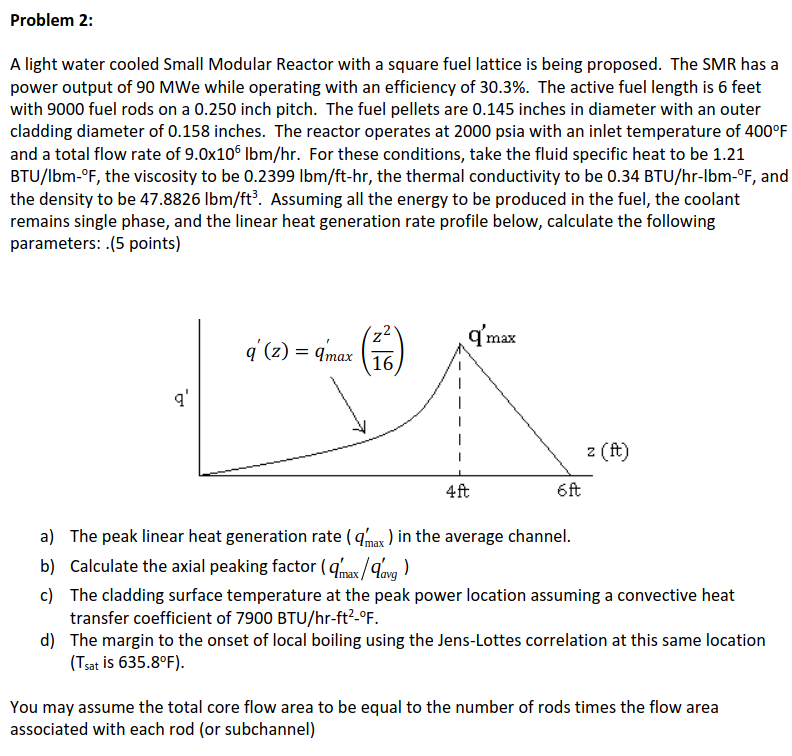

In [24]:
#Find Thermal Power Ouput
Q = 90e6/0.303 #W

#Find power per rod
q = Q/9e3 #W/(rod)

#Set up equation to find q_prime_max
z, q_prime_max = sm.symbols('z, q_prime_max')
q_balance = sm.Eq(q, sm.integrate(q_prime_max*z**2/16, (z, 0, 4)) + (q_prime_max*2)/2)
q_prime_max_value = sm.solve(q_balance, q_prime_max)

answer_print('2a', f'{q_prime_max_value[0]:.3e} W/ft')


=========FINAL ANSWER=========
2a:
1.414e+4 W/ft
=========FINAL ANSWER=========



In [25]:
#Calculate axial peaking factor:
answer_print('2b', f'{q_prime_max_value[0]/(q/6):.3e}')


=========FINAL ANSWER=========
2b:
2.571e+0
=========FINAL ANSWER=========



In [26]:
#Calculate Cladding Temperature
h = 7900 #BTU/(hr-ft^2-F)
T_bulk = 400 #F
D_clad_o = 0.158/12 #ft

T_clad_max = (q_prime_max_value[0]*3.41) /np.pi/D_clad_o/h + T_bulk

answer_print('2c', f'{T_clad_max:.3f} F') 


=========FINAL ANSWER=========
2c:
547.599 F
=========FINAL ANSWER=========



In [34]:
P = 2000 #lbs/ft^2

#Find the flux as found for temperature in 2c:
q_pprime_2c = h*(T_clad_max - T_bulk)
print(f'{q_pprime_2c:.3e} BTU/(hr-ft^2)')

#Calculate q_pprime using Jens-Lottes
q_pprime_jl = (np.exp(P/900)/1.9*(T_clad_max - 635.8))**4
print(f'{q_pprime_jl:.3e} BTU/(hr-ft^2)')

#Calculate flux margin:
q_pprime_margin = q_pprime_jl - q_pprime_2c

answer_print('2d',f'We can afford {q_pprime_margin:.3e} BTU/(hr-ft^2) more flux before local boiling initiates.')

1.166e+6 BTU/(hr-ft^2)
3.367e+10 BTU/(hr-ft^2)

=========FINAL ANSWER=========
2d:
We can afford 3.367e+10 BTU/(hr-ft^2) more flux before local boiling initiates.
=========FINAL ANSWER=========

